#Sources:

**week(5):**

https://www.datacamp.com/community/tutorials/deep-learning-python?utm_source=adwords_ppc#

https://stackoverflow.com/questions/50125844/how-to-standard-scale-a-3d-matrix/50134698

https://keras.io/guides/sequential_model/

https://stackoverflow.com/questions/43237124/what-is-the-role-of-flatten-in-keras

https://note.nkmk.me/en/python-numpy-reshape-usage/

https://debuggercafe.com/adam-algorithm-for-deep-learning-optimization/

**week(6):**

https://www.tensorflow.org/tutorials/images/data_augmentation

https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

https://www.pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/

https://www.machinecurve.com/index.php/2020/02/05/how-to-use-cropping-layers-with-keras/

https://gist.github.com/rstml/bbd491287efc24133b90d4f7f3663905

# Libraries Loading -  Randomness

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as layers

import tensorflow.keras as keras
from sklearn.preprocessing import StandardScaler
'''
from tensorflow import random
np.random.seed(1337)
random.set_seed(1337)
'''
import random

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Cropping2D, Flatten, Dense

#Functions

In [2]:
def scaling_data_to_0_1(x_train, x_test, normalize_factor):

  # Scale images to the [0, 1] range
  x_train = x_train.astype("float32") / normalize_factor
  x_test = x_test.astype("float32") / normalize_factor

  # Make sure images have shape (28, 28, 1)
  x_train = np.expand_dims(x_train, -1)
  x_test = np.expand_dims(x_test, -1)

  return x_train, x_test


def targetVar_categoricalEncoding(y_train, y_test, num_classes):
  # convert class vectors to "binary" class matrices (one-hot)
  y_train = tf.keras.utils.to_categorical(y_train, num_classes)
  y_test = tf.keras.utils.to_categorical(y_test, num_classes)
  return y_train, y_test


def print_info_train_test(x_train, x_test, y_train, y_test, s):
  print(s)
  print("x_train shape: ", x_train.shape)
  print("train samples: ", x_train.shape[0]); print("test samples: ",x_test.shape[0])
  print('y_train: ', y_train.shape); print('y_test: ', y_test.shape)


def show_random_images(numImages, dataset, rows, cols):

  for i in range(numImages):
    rand_index = np.random.choice(dataset.shape[0])
    rand_img = dataset[rand_index]
    plt.figure()
    plt.imshow(rand_img.reshape(rows, cols))


def plot_accuracy_loss(history):

  plt.plot(history.history['val_accuracy'], label='validation')
  plt.plot(history.history['accuracy'], label='train')
  plt.title('Accuracy')
  plt.legend()
  plt.show(); plt.clf()

  plt.plot(history.history['val_loss'], label='validation')
  plt.plot(history.history['loss'], label='train')
  plt.title('Loss')
  plt.legend()
  plt.show(); plt.clf()


def standarizing_data(x_train, x_test, intToFloatFlag):
  '''
  Only the training set will be used to calculate standarization's coefficients.
  However, standarization will be applied both to training and testing data.
  '''
  scaler = StandardScaler().fit(x_train.reshape(-1, x_train.shape[-1]))
  
  # Standarizing - scaling the training set
  x_train_standard = scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
  # Standarizing - scaling the testing set
  x_test_standard = scaler.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape)
  '''
  x_train_standard = np.expand_dims(x_train_standard, -1)
  x_test_standard = np.expand_dims(x_test_standard, -1)
  '''
  if intToFloatFlag:
    x_train_standard_float = x_train_standard.astype('float32')
    x_test_standard_float = x_test_standard.astype('float32')
    return x_train_standard_float, x_test_standard_float

  return x_train_standard, x_test_standard  


def adding_inputLayer(model, input_shape, flattenFlag, randCropFlag):

    # Adding input(s) layer(s)
    
    if randCropFlag:
      #model.add(layers.RandomCrop( height=26, width=26, seed=None) )
      '''
      left_shift = random.randint(0, int((width - target_width)))
      down_shift = random.randint(0, int((height - target_height)))
      return img.crop((left_shift, down_shift, target_width + left_shift, target_height + down_shift))
      '''
      #(top_crop, bottom_crop), (left_crop, right_crop)
      top_crop, bottom_crop, left_crop, right_crop = input_shape[1], input_shape[1], input_shape[0], input_shape[0]
      while top_crop + bottom_crop>=input_shape[1]:
        top_crop, bottom_crop= random.randint(0, int(input_shape[1])), random.randint(0, int(input_shape[1]))
        print(top_crop, bottom_crop)
      
      while left_crop + right_crop>=input_shape[0]:
        left_crop, right_crop= random.randint(0, int(input_shape[0])), random.randint(0, int(input_shape[0]))
        print(left_crop, right_crop)
      
      model.add(Cropping2D(cropping=((top_crop, bottom_crop), (left_crop, right_crop)), input_shape=input_shape))
      if flattenFlag:
        model.add(Flatten())
    
    else:
      if flattenFlag:
        model.add(layers.Flatten(input_shape = input_shape ))# from 28x28x1 => 784x1
      else:
        model.add(layers.Dense(input_output_units[0], activation=input_output_AFs[0], input_shape = input_shape))
    return model


def buildModel(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units,  hiddenLayers_units, flattenFlag, randCropFlag):
  # Initialize the constructor
  model = tf.keras.Sequential()
  model = adding_inputLayer(model, input_shape, flattenFlag, randCropFlag)
  # Addind hidden layers
  for i in range(len(hiddenLayers_AFs)):
    model.add(layers.Dense(hiddenLayers_units[i], activation=hiddenLayers_AFs[i]))
  
  # Adding output layer 
  model.add(layers.Dense(input_output_units[1], activation=input_output_AFs[1]))

  model.summary()

  return model


def buildModel_regL1L2(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units,  hiddenLayers_units, flattenFlag, randCropFlag, l1_coef, l2_coef, kernelRegs):
  # Initialize the constructor
  model = tf.keras.Sequential()
  
  # Regularizer object
  reg = keras.regularizers.l1_l2(l1=l1_coef, l2=l2_coef)  
  kernelRegs.insert(0,reg)

  # Adding input layer 
  if flattenFlag:
    model.add(layers.Flatten(input_shape = input_shape ))# from 28x28x1 => 784x1
  else:
    model.add(layers.Dense(input_output_units[0], activation=input_output_AFs[0], input_shape = input_shape))
  
  # Addind hidden layers
  for i in range(len(hiddenLayers_AFs)):
    model.add(layers.Dense(hiddenLayers_units[i], activation=hiddenLayers_AFs[i], kernel_regularizer=kernelRegs[i]))
  
  # Adding output layer 
  model.add(layers.Dense(input_output_units[1], activation=input_output_AFs[1]))

  model.summary()

  return model


def buildModel_dropOut_or_batchNorm(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units,  hiddenLayers_units, flattenFlag,  randCropFlag, p, dr_ba_layers):
  # Initialize the constructor
  model = tf.keras.Sequential()
  
  # Regularizer object
  reg = keras.regularizers.l1_l2(l1=l1_coef, l2=l2_coef)  
  kernelRegs.insert(0,reg)

  # Adding input layer 
  if flattenFlag:
    model.add(layers.Flatten(input_shape = input_shape ))# from 28x28x1 => 784x1
  else:
    model.add(layers.Dense(input_output_units[0], activation=input_output_AFs[0], input_shape = input_shape))
  
  # Addind hidden layers
  if p!=-1:
    for i in range(len(hiddenLayers_AFs)):
      model.add(layers.Dense(hiddenLayers_units[i], activation=hiddenLayers_AFs[i]))
      if dr_ba_layers[i]:
        model.add(layers.Dropout(p))
  else:
    for i in range(len(hiddenLayers_AFs)):
      model.add(layers.Dense(hiddenLayers_units[i], activation=hiddenLayers_AFs[i]))
      if dr_ba_layers[i]:
        model.add(layers.BatchNormalization())
  
  # Adding output layer 
  model.add(layers.Dense(input_output_units[1], activation=input_output_AFs[1]))

  model.summary()

  return model


def trainModel(model, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train, y_train, augFlag):
  model.compile(loss = loss_fun, optimizer = opt, metrics = metrics )
  if augFlag:
    # define data preparation
    datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
    # fit parameters from data
    datagen.fit(x_train)
    model_history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size), validation_data=(x_test,y_test), steps_per_epoch=len(x_test)//batch_size, epochs=epochs)
  else:
    model_history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = valSplit)
  return model, model_history


def evalModel(model, x_test, y_test, verb):
  # Model Evaluating
  score = model.evaluate(x_test, y_test, verbose = verb)
  print("\nTest loss:", score[0]); print("\nTest accuracy:", score[1])


# Ερώτημα 1: Data Loading - Standarization


4431872/4422102 [==============================] - 0s 0us/step
Initial dataset MLP_F_MNIST
x_train shape:  (60000, 28, 28, 1)
train samples:  60000
test samples:  10000
y_train:  (60000,)
y_test:  (10000,)
Standarized dataset F-MNIST
x_train shape:  (60000, 28, 28, 1)
train samples:  60000
test samples:  10000
y_train:  (60000, 10)
y_test:  (10000, 10)


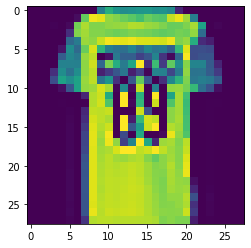

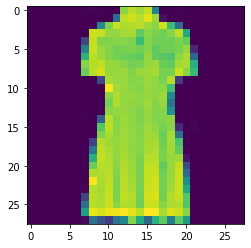

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
normalize_factor = 255
s="Initial dataset MLP_F_MNIST"
intToFloatFlag=True

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Scaling images to the [0, 1] range and making sure images have shape (28, 28, 1)
x_train, x_test = scaling_data_to_0_1(x_train, x_test, normalize_factor)

print_info_train_test(x_train, x_test, y_train, y_test, s)

# convert class vectors to "binary" class matrices (one-hot)
y_train, y_test = targetVar_categoricalEncoding(y_train,y_test,num_classes)

#print_info_train_test(x_train, x_test, y_train, y_test,s)

# show a random image
numImages=1
show_random_images(numImages, x_train, input_shape[0], input_shape[1])


#Standarization
s="Standarized dataset F-MNIST"
# Standarization - Transforming the data (images) to  ~N(0,1)
x_train_standard, x_test_standard = standarizing_data(x_train, x_test, intToFloatFlag)

print_info_train_test(x_train_standard, x_test_standard, y_train, y_test, s)

# show a random image
numImages=1
show_random_images(numImages, x_train_standard, input_shape[0], input_shape[1])

#Ερώτημα 1: sgd and momentum Model Building - Training - Evaluating - Presentation

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
422/422 [==============================] - 4s 5ms/step - loss: 0.5198 - accuracy: 0.8148 - val_loss: 0.3936 - val_accuracy: 0.8537
Epoch 2/50
422/422 [==============================] - 2s 4ms/step - loss: 0.3818 - accuracy: 0.8607 - val_loss: 0.3669 - val_accuracy: 0.8625
Epoch 3/50
422/422 [==========

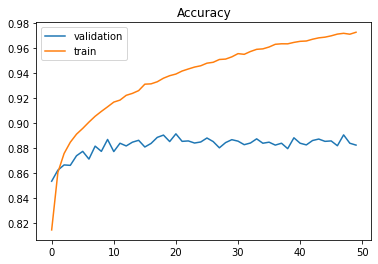

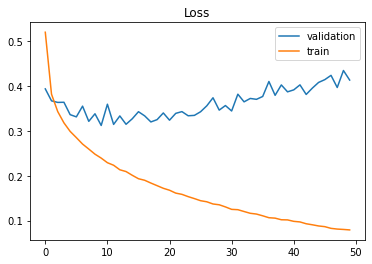

<Figure size 432x288 with 0 Axes>

In [4]:
# Model Building
input_output_AFs = ["","softmax"] 
hiddenLayers_AFs = ["relu"]
input_output_units = [-1, num_classes]
hiddenLayers_units =[128]
flattenFlag=True
augFlag, randCropFlag = False, False

standarDataModel = buildModel(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units, hiddenLayers_units, flattenFlag, randCropFlag)

# Model Training
epochs, batch_size, valSplit = 50, 128, 0.1
#epochs, batch_size, valSplit = 5, 128, 0.1
loss_fun = "categorical_crossentropy"
#sgd_momentum model
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.1)
metrics = ["accuracy"]

standarDataModel_sgd_momentum, standarDataModel_sgd_momentum_history = trainModel(standarDataModel, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train, augFlag)

# Model Evaluating
verb=0
evalModel(standarDataModel_sgd_momentum, x_test_standard, y_test, verb)

# Model presentation
plot_accuracy_loss(standarDataModel_sgd_momentum_history)

**50 epochs**

# Ερώτημα 2


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
Total params: 400,906
Trainable params: 400,906
Non-tr

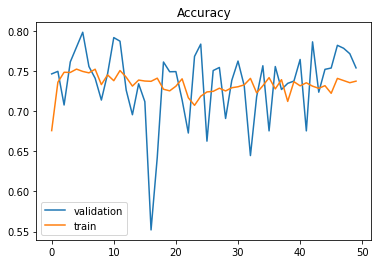

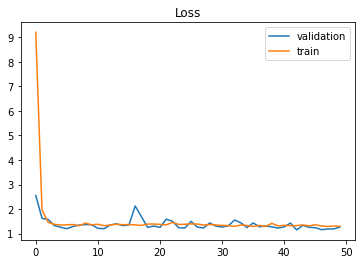

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)              

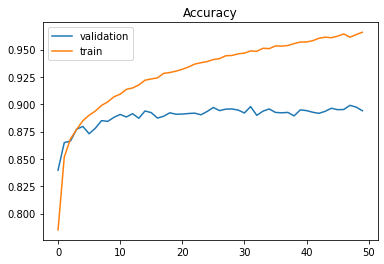

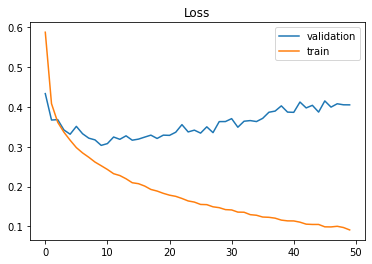

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 256)              

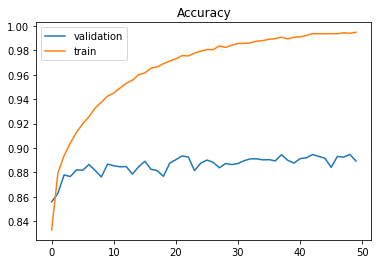

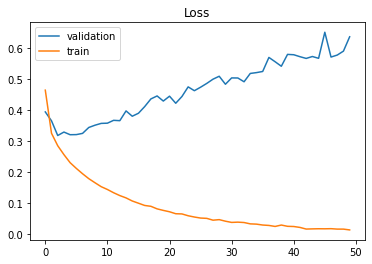

<Figure size 432x288 with 0 Axes>

In [5]:
# Model Building parameters
input_output_AFs = ["","softmax"] 
hiddenLayers_AFs = ["relu","relu","relu","relu"]
input_output_units = [-1, num_classes]
hiddenLayers_units =[256,256,256,256]
flattenFlag=True
augFlag, randCropFlag = False, False

# Model Training parameters
#epochs, batch_size, valSplit = 5, 128, 0.1
epochs, batch_size, valSplit = 50, 128, 0.1
loss_fun = "categorical_crossentropy"
#sgd_momentum model
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.1)
metrics = ["accuracy"]
#'''
# L2 Regularization
# Building
l1_coef, l2_coef, kernelRegs = 0.005, 0.005, ['l2','l2','l2']
standarDataModel_L2 = buildModel_regL1L2(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units,  hiddenLayers_units, flattenFlag, randCropFlag, l1_coef, l2_coef, kernelRegs)
# Training
standarDataModel_L2, standarDataModel_L2_history = trainModel(standarDataModel_L2, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train, augFlag)
# Evaluating
verb=0
evalModel(standarDataModel_L2, x_test_standard, y_test, verb)
# Presentation
plot_accuracy_loss(standarDataModel_L2_history)


# Dropout
# Building
p=0.1
dropOutLayers=[1,1,1,1]
standarDataModel_dropOut = buildModel_dropOut_or_batchNorm(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units,  hiddenLayers_units, flattenFlag, randCropFlag, p, dropOutLayers)
# Training
standarDataModel_dropOut, standarDataModel_dropOut_history = trainModel(standarDataModel_dropOut, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train, augFlag)
# Evaluating
verb=0
evalModel(standarDataModel_dropOut, x_test_standard, y_test, verb)
# Presentation
plot_accuracy_loss(standarDataModel_dropOut_history)

#'''
# Batchnorm
# Building
p=-1
batcNormLayers=[1,1,1,1]
standarDataModel_batchNorm =  buildModel_dropOut_or_batchNorm(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units,  hiddenLayers_units, flattenFlag, randCropFlag, p, batcNormLayers)
# Training
standarDataModel_batchNorm, standarDataModel_batchNorm_history = trainModel(standarDataModel_batchNorm, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train, augFlag)
# Evaluating
verb=0
evalModel(standarDataModel_batchNorm, x_test_standard, y_test, verb)
# Presentation
plot_accuracy_loss(standarDataModel_batchNorm_history)
#'''


# Ερώτημα 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:191: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
78/78 [==============================] - 2s 20ms/step - loss: 1.0442 - accuracy: 0.7370 - val_loss: 0.8671 - val_accuracy: 0.6989
Epoch 2/50
78/78 [==============================] - 1s 18ms/step - loss: 0.5998 - accuracy: 0.8080 - val_loss: 0.8194 - val_accuracy: 0.7148
Epoch 3/50
78/78 [==============================] - 1s 18ms/step - loss: 0.5349 - accuracy: 0.8209 - val_loss: 0.8054 - val_accuracy: 0.7258
Epoch 4/50
78/78 [==============================] - 1s 18ms/step - loss: 0.4985 - accuracy: 0.8310 - val_loss: 0.8667 - val_accuracy: 0.6983
Epoch 5/50
78/78 [==============================] - 2s 24ms/step - loss: 0.4927 - accuracy: 0.8325 - val_loss: 0.7702 - val_accuracy: 0.7439
Epoch 6/50
78/78 [==============================] - 1s 19ms/step - loss: 0.4830 - accuracy: 0.8383 - val_loss: 0.8667 - val_accuracy: 0.6886
Epoch 7/50
78/78 [==============================] - 1s 19ms/step - loss: 0.4610 - accuracy: 0.8447 - val_loss: 0.8709 - val_accuracy: 0.6991
Epoch 8/50
78

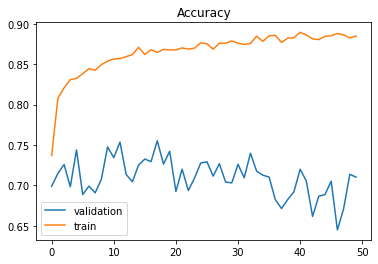

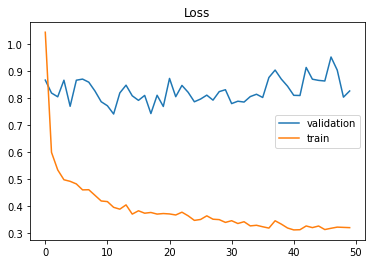

12 10
28 28
24 1
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cropping2d (Cropping2D)     (None, 6, 3, 1)           0         
                                                                 
 flatten_4 (Flatten)         (None, 18)                0         
                                                                 
 dense_17 (Dense)            (None, 256)               4864      
                                                                 
 dense_18 (Dense)            (None, 256)               65792     
                                                                 
 dense_19 (Dense)            (None, 256)               65792     
                                                                 
 dense_20 (Dense)            (None, 256)               65792     
                                                                 
 dense_21 (Dense)            (None, 1

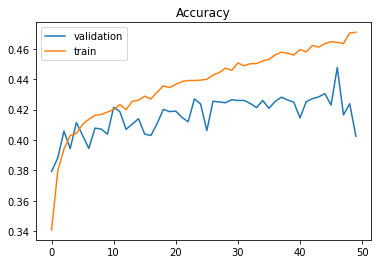

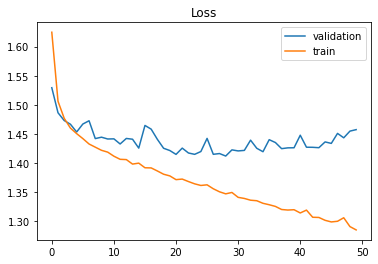

<Figure size 432x288 with 0 Axes>

In [6]:
## Random Flip
input_shape = (28, 28, 1)
# Model Training
augFlag=True
standarDataModel_sgd_momentum, standarDataModel_sgd_momentum_history = trainModel(standarDataModel, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train, augFlag)

# Model Evaluating
verb=0
evalModel(standarDataModel_sgd_momentum, x_test_standard, y_test, verb)

# Model presentation
plot_accuracy_loss(standarDataModel_sgd_momentum_history)

## "Random" Cropping
augFlag, randCropFlag = False, True 
standarDataModel = buildModel(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units, hiddenLayers_units, flattenFlag, randCropFlag)

# Model Training
#epochs, batch_size, valSplit = 5, 128, 0.1
epochs, batch_size, valSplit = 50, 128, 0.1
loss_fun = "categorical_crossentropy"
#sgd_momentum model
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.1)
metrics = ["accuracy"]

standarDataModel_sgd_momentum, standarDataModel_sgd_momentum_history = trainModel(standarDataModel, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train, augFlag)

# Model Evaluating
verb=0
evalModel(standarDataModel_sgd_momentum, x_test_standard, y_test, verb)

# Model presentation
plot_accuracy_loss(standarDataModel_sgd_momentum_history)